In [135]:
import os
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dask
import xarray as xr
import intake_xarray 
from intake import open_catalog
import os
from geopy.distance import distance


In [136]:
cat = open_catalog("velox_bt.yaml")
list(cat)

['HALO-0124',
 'HALO-0126',
 'HALO-0128',
 'HALO-0130',
 'HALO-0131',
 'HALO-0202',
 'HALO-0205',
 'HALO-0207',
 'HALO-0209',
 'HALO-0211',
 'HALO-0213',
 'HALO-0215']

In [146]:
VELOX = cat['HALO-0215'].to_dask()
METEOR = xr.open_dataset('meteor_standard.nc')

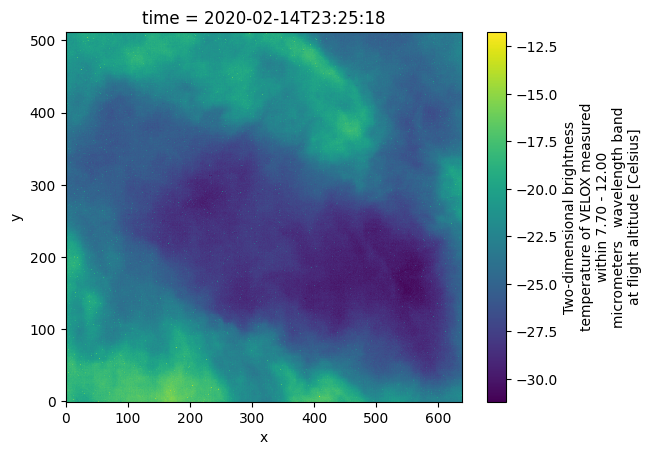

In [147]:
VELOX.sel(time='2020-02-15T20:43:00', method='nearest').BT_2D.plot(x='x')

In [42]:
# Load the aircraft and ship data into xarray DataArrays, assuming they have coordinates time, latitude, and longitude
aircraft_data = VELOX
ship_data = METEOR

# Identify the time range where both the aircraft and ship data are available
tmin, tmax = max([aircraft_data.time.min(), ship_data.time.min()]), min([aircraft_data.time.max(), ship_data.time.max()])
common_time_range = slice(tmin, tmax)

# Select the aircraft and ship data for the common time range
aircraft_common = aircraft_data.sel(time=common_time_range)
ship_common = ship_data.sel(time=common_time_range)

# Interpolate the aircraft and ship data to the same time intervals
aircraft_interp = aircraft_common.interp(time=ship_common.time)
ship_interp = ship_common

# Calculate the distance between the aircraft and ship at each time interval
relative_pos_HALO_METEOR = np.array([distance((y1, x1),(y2, x2)).km for (y1, x1, y2, x2) in zip(aircraft_interp.lat.values, aircraft_interp.lon.values, ship_interp.lat.values, ship_interp.lon.values)])

ship_interp['relative_pos'] = (('time'), relative_pos_HALO_METEOR)



/home/josh/miniconda3/envs/py38/lib/python3.8/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/josh/miniconda3/envs/py38/lib/python3.8/site-packages/xarray/core/indexing.py:1379: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/

IndexError: index 0 is out of bounds for axis 0 with size 0

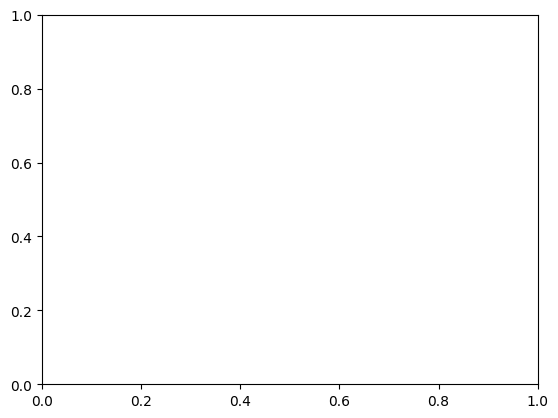

In [94]:
#x = ship_interp.where(ship_interp.relative_pos < 3).SST_port.groupby('time.hour').mean()
#y = aircraft_interp.where(ship_interp.relative_pos < 3).BT_2D.groupby('time.hour').quantile(0.9)

#plt.plot(x, y, 'o', linestyle='')

In [126]:
#ship_interp.groupby('time.hour').first().where(ship_interp.time.dt.hour == 0, drop=True)

ValueError: Dimensions {'time'} do not exist. Expected one or more of Frozen({'hour': 10})

In [132]:
hourly_first = overpass_times.groupby('time.hour').first('time')
hourly_first



<xarray.DataArray 'time' (hour: 6)>
array(['2020-02-11T13:47:16.000000000', '2020-02-11T14:44:54.000000000',
       '2020-02-11T15:43:43.000000000', '2020-02-11T16:43:50.000000000',
       '2020-02-11T17:45:16.000000000', '2020-02-11T18:48:03.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * hour     (hour) int32 13 14 15 16 17 18

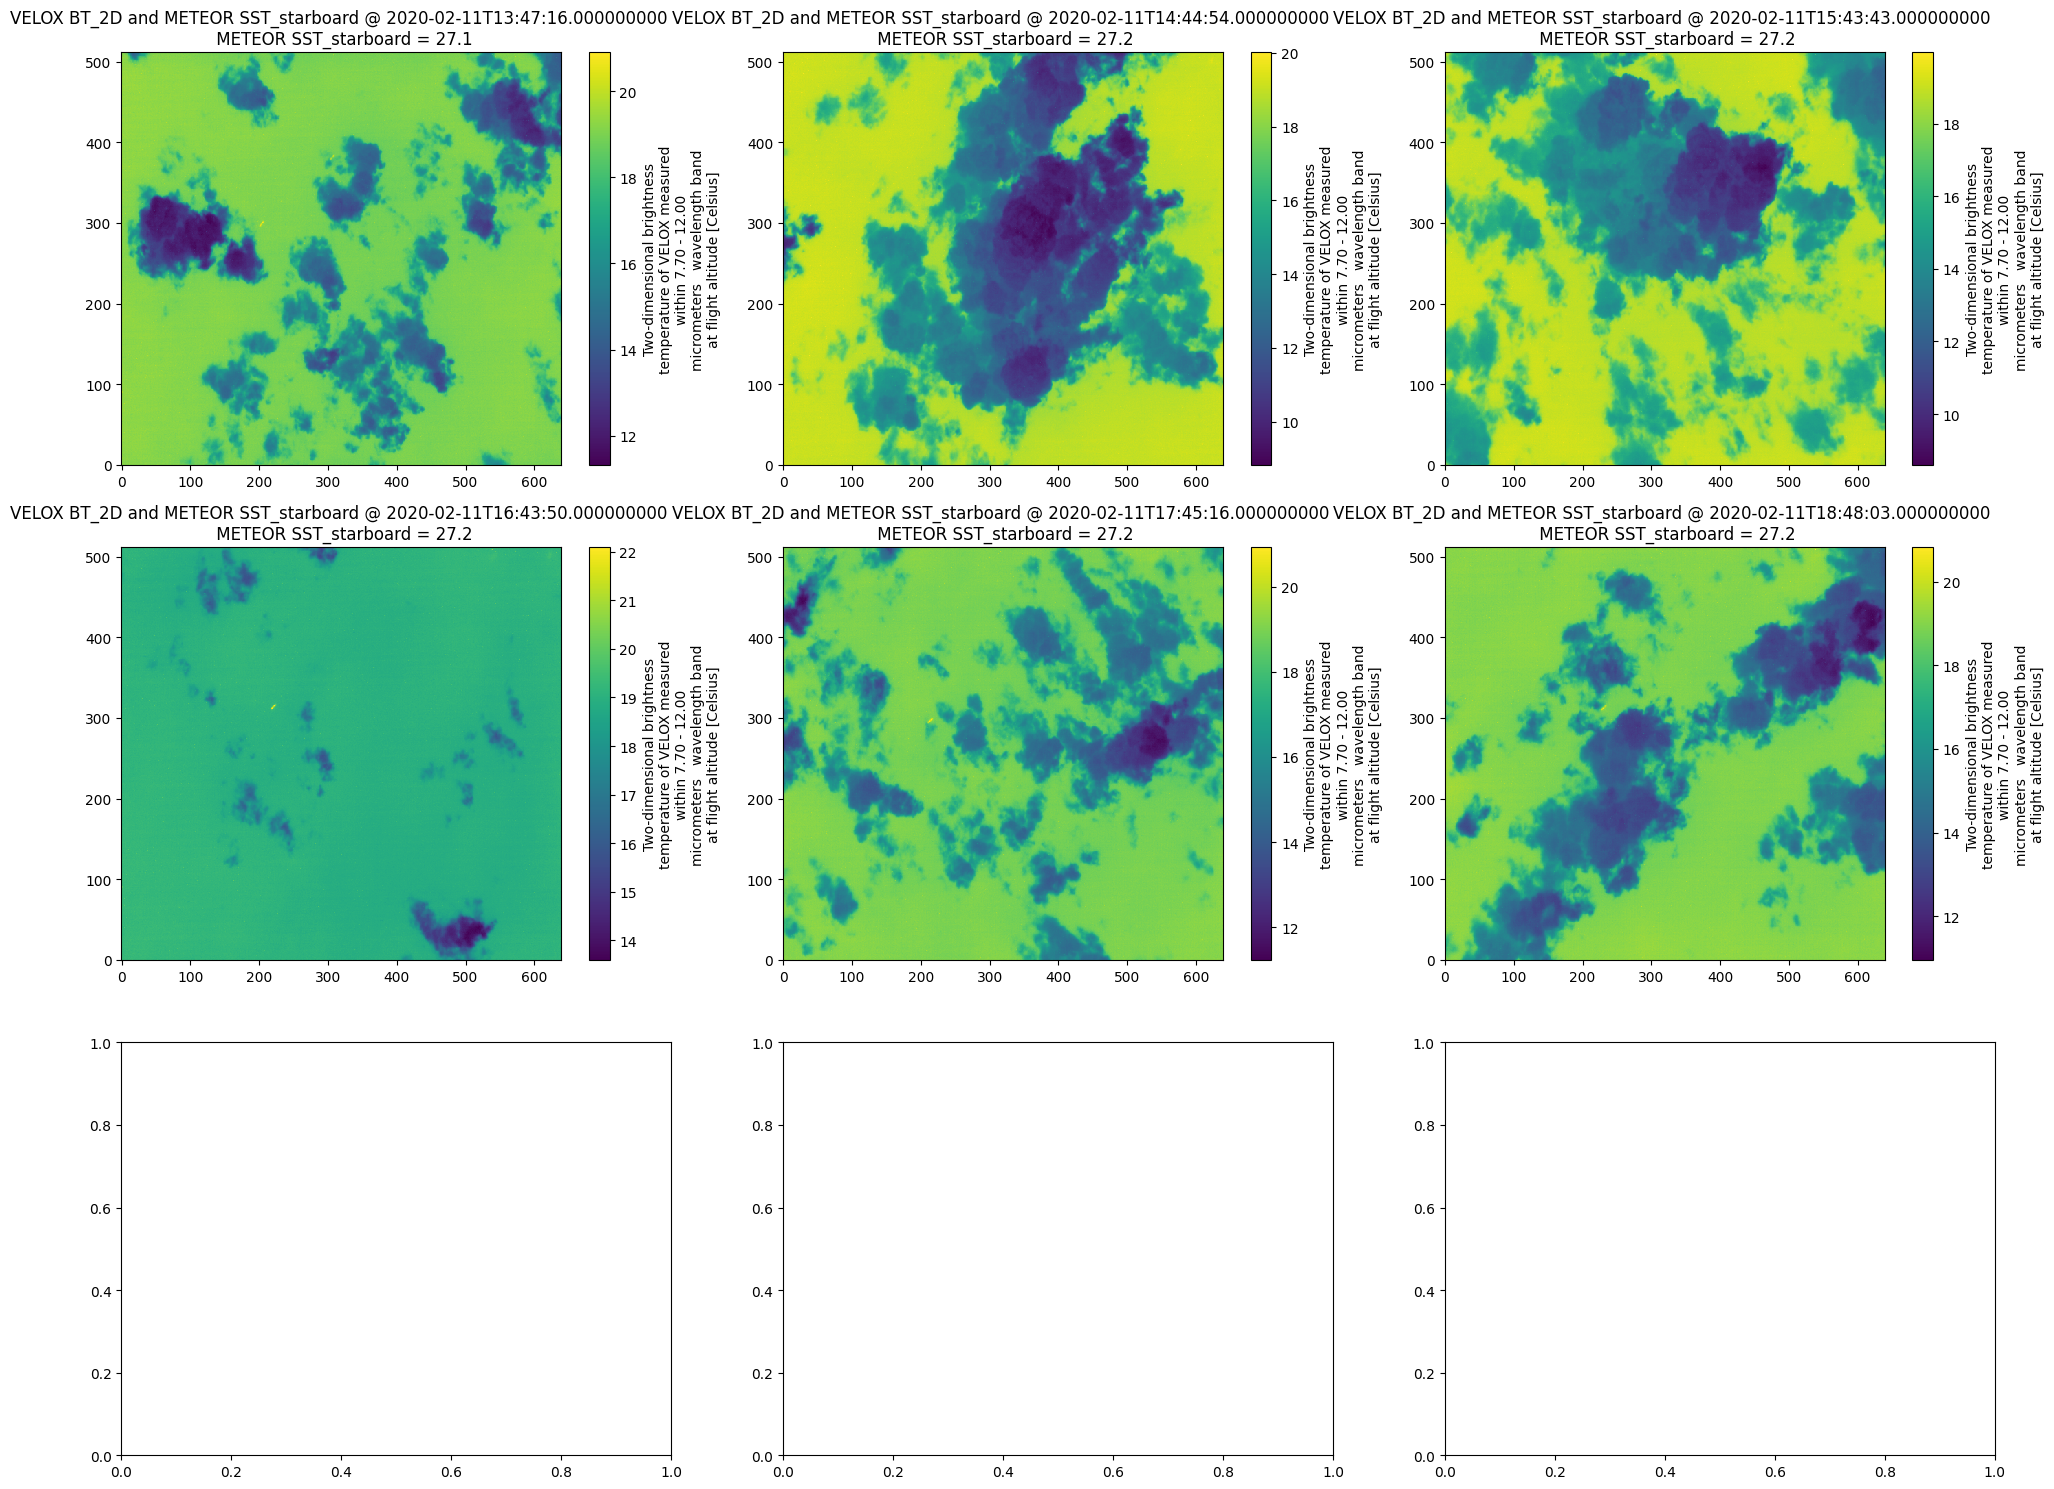

In [134]:
overpass_times = hourly_first
N = len(overpass_times) // 3 + 1

fig, axs = plt.subplots(3, N, figsize=(20, 15))

for overpass_time, ax in zip(overpass_times, axs.flatten()):

    VELOX.sel(time=overpass_time, method='nearest').BT_2D.plot(ax=ax, x='x')
    meteor_sst = METEOR.SST_starboard.dropna(dim='time', how='all').sel(time=overpass_time, method='nearest').values
    ax.set_title(f'VELOX BT_2D and METEOR SST_starboard @ {overpass_time.values} \n METEOR SST_starboard = {meteor_sst.item()}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()

In [ ]:
overpass = relative_pos_HALO_METEOR
ship_common.isel(time=)

KeyboardInterrupt: 

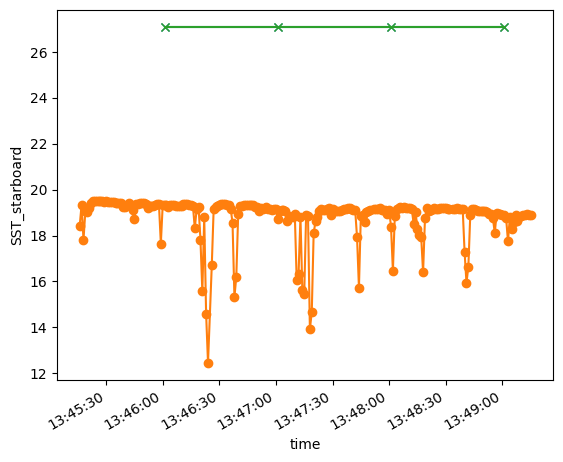

In [37]:
overpass = relative_pos_HALO_METEOR < 1

overpass_times = ship_common.isel(time=overpass).time


for overpass_time in overpass_times:
    t_a = (overpass_time.values - np.timedelta64(2, 'm'))
    t_e = (overpass_time.values + np.timedelta64(2, 'm'))

    overpass_slice = slice(t_a, t_e)

    METEOR.SST_starboard.dropna(dim='time', how='all').sel(time=overpass_slice).plot(marker='x')
    VELOX.BT_Center.dropna(dim='time', how='all').sel(time=overpass_slice).plot(marker='o')

In [35]:
for ov

<xarray.DataArray 'time' (time: 43)>
array(['2020-02-11T13:47:16.000000000', '2020-02-11T13:47:17.000000000',
       '2020-02-11T13:47:18.000000000', '2020-02-11T13:47:19.000000000',
       '2020-02-11T13:47:20.000000000', '2020-02-11T13:47:21.000000000',
       '2020-02-11T13:47:22.000000000', '2020-02-11T14:44:54.000000000',
       '2020-02-11T14:44:55.000000000', '2020-02-11T14:44:56.000000000',
       '2020-02-11T14:44:57.000000000', '2020-02-11T14:44:58.000000000',
       '2020-02-11T14:44:59.000000000', '2020-02-11T14:45:00.000000000',
       '2020-02-11T14:45:01.000000000', '2020-02-11T15:43:43.000000000',
       '2020-02-11T15:43:44.000000000', '2020-02-11T15:43:45.000000000',
       '2020-02-11T15:43:46.000000000', '2020-02-11T15:43:47.000000000',
       '2020-02-11T15:43:48.000000000', '2020-02-11T15:43:49.000000000',
       '2020-02-11T16:43:50.000000000', '2020-02-11T16:43:51.000000000',
       '2020-02-11T16:43:52.000000000', '2020-02-11T16:43:53.000000000',
       '2020-02-11T16:43:54.000000000', '2020-02-11T16:43:55.000000000',
       '2020-02-11T16:43:56.000000000', '2020-02-11T17:45:16.000000000',
       '2020-02-11T17:45:17.000000000', '2020-02-11T17:45:18.000000000',
       '2020-02-11T17:45:19.000000000', '2020-02-11T17:45:20.000000000',
       '2020-02-11T17:45:21.000000000', '2020-02-11T17:45:22.000000000',
       '2020-02-11T18:48:03.000000000', '2020-02-11T18:48:04.000000000',
       '2020-02-11T18:48:05.000000000', '2020-02-11T18:48:06.000000000',
       '2020-02-11T18:48:07.000000000', '2020-02-11T18:48:08.000000000',
       '2020-02-11T18:48:09.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-02-11T13:47:16 ... 2020-02-11T18:48:09
    lat      (time) float64 14.18 14.18 14.18 14.18 ... 14.18 14.18 14.18 14.18
    lon      (time) float64 -57.25 -57.25 -57.25 -57.25 ... -57.25 -57.25 -57.25

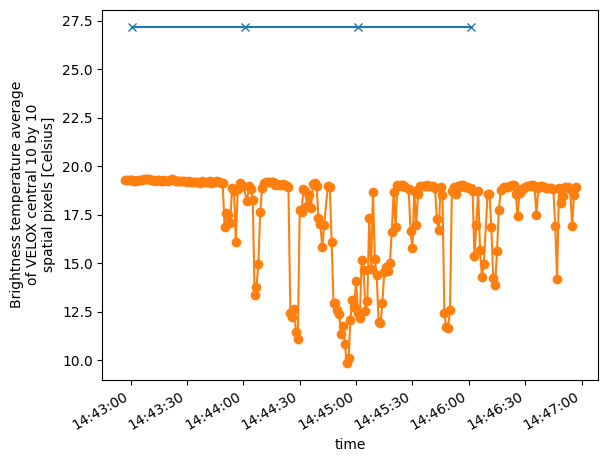

Text(0.5, 1.0, "VELOX BT_2D and METEOR SST_starboard @ ['2020-02-11T14:44:57.000000000'] \n METEOR SST_starboard = 27.2")

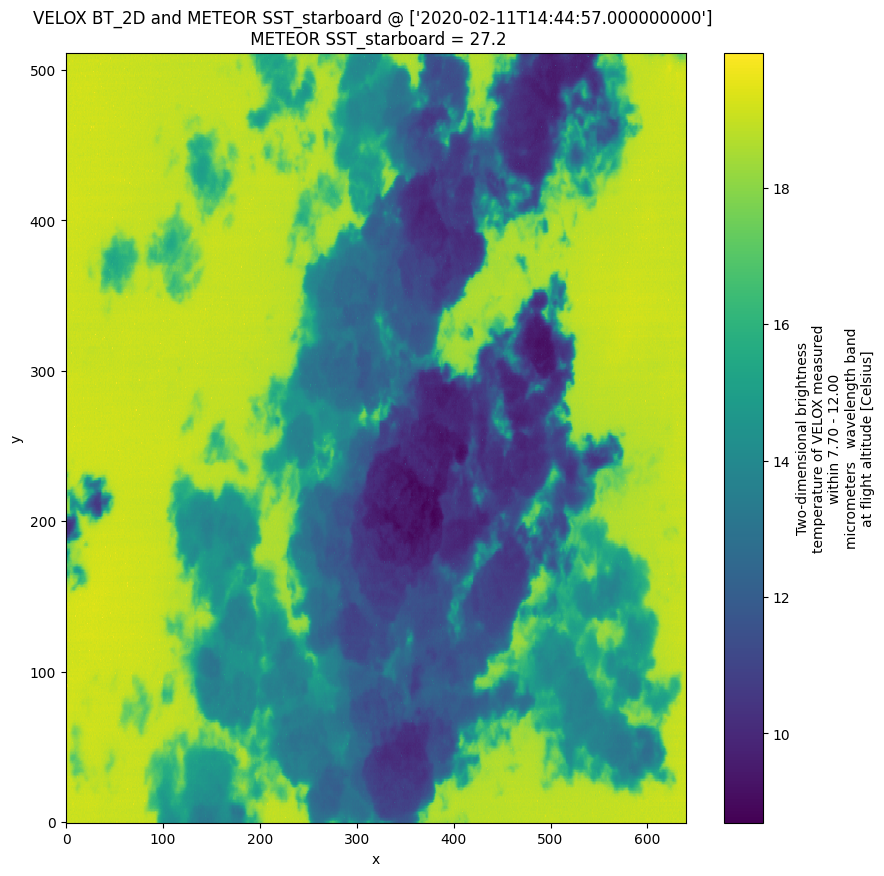

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))

VELOX.sel(time=overpass_time, method='nearest').BT_2D.plot(ax=ax, x='x')
meteor_sst = METEOR.SST_starboard.dropna(dim='time', how='all').sel(time=overpass_time, method='nearest').values
ax.set_title(f'VELOX BT_2D and METEOR SST_starboard @ {overpass_time.values} \n METEOR SST_starboard = {meteor_sst.item()}')